In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#making a connection to the postgres sql
rds_connection_string = "root:postgres@project-4.c4nxp8i2sic3.eu-west-2.rds.amazonaws.com:5432/stroke_data"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
df = pd.read_sql_query('select * from stroke_dataset', con=engine)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
scientific_df = pd.read_sql_query('select * from public.scientific_variables', con=engine).head()
scientific_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


In [5]:
scientific_variables = scientific_df.select_dtypes(exclude='object').columns.to_list()
scientific_variables

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

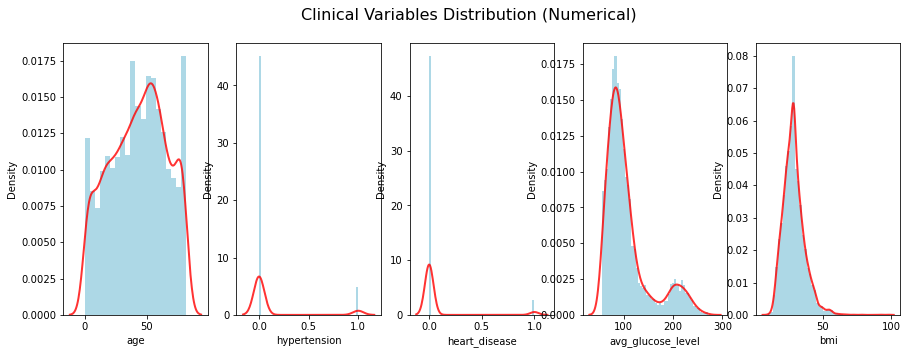

In [6]:
k=1
fig = plt.figure(figsize=(15,5))
fig.suptitle("Clinical Variables Distribution (Numerical)", fontsize = 16)

for col,k in zip(scientific_variables,np.arange(1,len(scientific_variables))):
    ax = fig.add_subplot(1,5,k)
    sns.distplot(df[col], ax=ax,kde=True, kde_kws={ "color":'r', "alpha": 0.8, "linewidth":2 }, hist_kws={ "linewidth": 3,
                            "alpha": 1, "color": "lightblue"} )
    fig.show()
    plt.savefig('Clinical_variables.png')

In [7]:
social_df = pd.read_sql_query('select * from public.social_variables', con=engine)
social_df.head()

,gender,ever_married,work_type,residence_type,smoking_status,stroke
0,Male,Yes,Private,Urban,formerly smoked,1
1,Female,Yes,Self-employed,Rural,never smoked,1
2,Male,Yes,Private,Rural,never smoked,1
3,Female,Yes,Private,Urban,smokes,1
4,Female,Yes,Self-employed,Rural,never smoked,1


In [8]:
social_variables = social_df.select_dtypes(include='object').columns.to_list()
social_variables

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

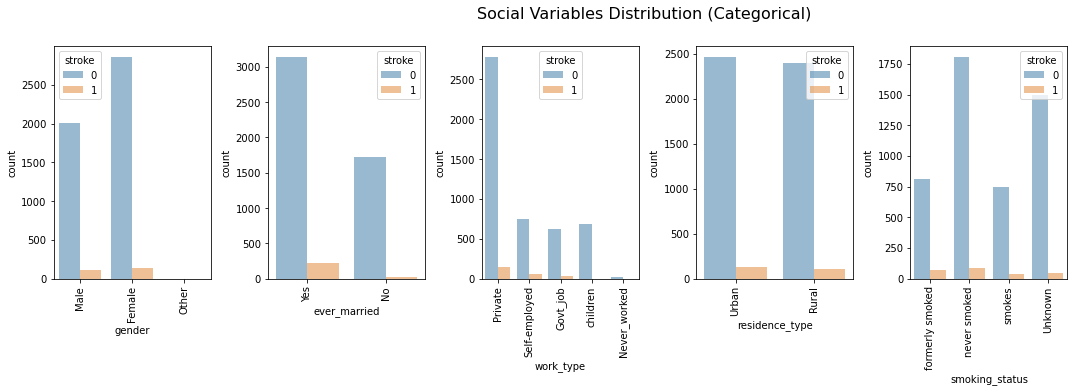

In [9]:
k=1
fig = plt.figure(figsize=(18,5))
fig.suptitle("Social Variables Distribution (Categorical)", fontsize = 16, y=1.08)

for col,k in zip(social_variables,np.arange(1,len(social_variables)+1)):
    ax = fig.add_subplot(1,6,k)
    sns.countplot(social_df[col], ax=ax, linewidth= 3, alpha= 0.5, hue=social_df['stroke'])
    plt.xticks(rotation=90)
    fig.tight_layout()
    fig.show()
    plt.savefig('Social_variables.png')